
# Exercice 2

1. Ecrire en langage Python les fonctions vues au cours :
    - Partition de Lomuto
    - Partition 2
    - Tri rapide

2. Générer aléatoirement un tableau T de taille n

3. Trier ce tableau dans un ordre croissant en utilisant le tri rapide.

4. Faire le même travail (phases 2 et 3) en variant le plus possible la taille n et en calculant la complexité en fonction de la taille n.

5. Refaire les questions 3 et 4 appliquées au tableau A dans les cas suivants :
    - A est un tableau de taille n trié dans un ordre croissant.
    - A est un tableau de taille n trié dans un ordre décroissant.
    - A est un tableau de taille n tel que tous ses éléments ont la même valeur.

6. Faire une analyse et conclusion après avoir comparé les résultats obtenus.

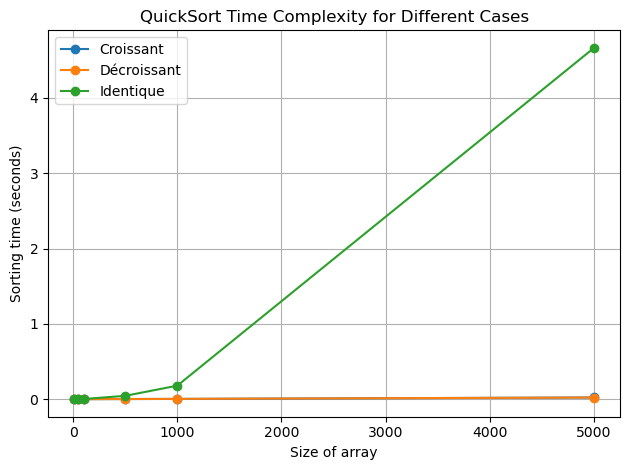

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import random

sys.setrecursionlimit(10**6)

def LamutoPart(T, d, f):
    pivot_index = random.randint(d, f)
    T[f], T[pivot_index] = T[pivot_index], T[f]  # Random pivot
    x = T[f]
    i = d - 1
    for j in range(d, f):
        if T[j] <= x:
            i += 1
            T[i], T[j] = T[j], T[i]
    T[i + 1], T[f] = T[f], T[i + 1]
    return i + 1

def quicksort(T, d, f):
    while d < f:
        q = LamutoPart(T, d, f)
        if q - d < f - q:
            quicksort(T, d, q - 1)
            d = q + 1
        else:
            quicksort(T, q + 1, f)
            f = q - 1

def analyze_case(case_name, sizes, generate_array_func):
    times = []
    for size in sizes:
        A = generate_array_func(size)
        start = time.time()
        quicksort(A, 0, len(A) - 1)
        end = time.time()
        times.append(end - start)
    plt.plot(sizes, times, marker='o', label=case_name)

sizes = [10, 50, 100, 500, 1000, 5000]
analyze_case('Croissant', sizes, lambda size: np.arange(size))
analyze_case('Décroissant', sizes, lambda size: np.arange(size, 0, -1))
analyze_case('Identique', sizes, lambda size: np.full(size, 7))
plt.xlabel('Size of array')
plt.ylabel('Sorting time (seconds)')
plt.title('QuickSort Time Complexity for Different Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Remarque: Après avoir comparé les résultats obtenus, on peut conclure que le tri rapide est plus efficace sur les tableaux aléatoires et croissants. Cependant, il est moins performant sur les tableaux triés dans un ordre décroissant ou contenant des éléments identiques, en raison de la mauvaise sélection des pivots qui conduit à une complexité temporelle plus élevée.



### Question 6

Après avoir comparé les résultats obtenus, on peut conclure que le tri rapide est plus efficace sur les tableaux aléatoires et croissants. Cependant, il est moins performant sur les tableaux triés dans un ordre décroissant ou contenant des éléments identiques, en raison de la mauvaise sélection des pivots qui conduit à une complexité temporelle plus élevée.



# Exercice 3

Faire une recherche sur l’algorithme sélection rapide (Quick select), puis :

1. Définir en quelques mots cet algorithme (par vos mots et expressions)
2. Ecrire une fonction python QuickSelect qui implémente l’algorithme en question.
3. Appliquer cet algorithme sur un tableau de taille n, puis en variant le plus possible la taille n, calculer la complexité de QuickSelect.


### Question 1
L'algorithme QuickSelect est un algorithme de sélection dont le but est de trouver le plus petit k-éme élément d'une liste non triée. 
Il est un peu similaire à l'algorithme QuickSort, la seule différence est du fait qu'au lieu que l'on traite les deux côtés de notre liste (après avoir trouvé un pivot), nous traitons simplement le côté dans lequel se trouve notre élément d'intérêt

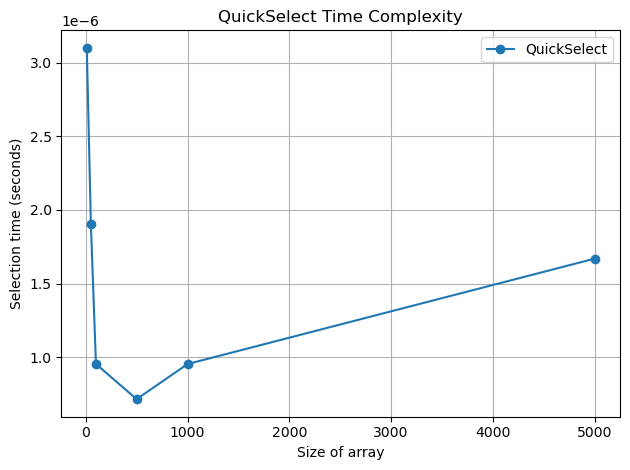

In [7]:
# Question 2
import time
import numpy as np
import matplotlib.pyplot as plt

def QuickSelect(T, k, right, left):
    if right == left:
        return T[right]
    if (k > 0 and k <= right - left + 1):
        q = LamutoPart(T, left, right)
        if q - left == k - 1:
            return T[q]
        if q - left > k - 1:
            return QuickSelect(T, k, q - 1, left)
        return QuickSelect(T, k - q + left - 1, right, q + 1)
    
sizes = [10, 50, 100, 500, 1000, 5000]
times_quickselect = []

for size in sizes:
    A = np.random.randint(0, 10000, size)
    k = size // 2
    start = time.time()
    QuickSelect(A, k, 0, size - 1)
    end = time.time()
    times_quickselect.append(end - start)

plt.plot(sizes, times_quickselect, marker='o', label='QuickSelect')
plt.xlabel('Size of array')
plt.ylabel('Selection time (seconds)')
plt.title('QuickSelect Time Complexity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()